In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import EvolutionStrategy as EvosStrat
importlib.reload(EvosStrat)
EvolutionStrategyClass = EvosStrat.EvolutionStrategy
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [3]:
import itertools
n = 500
x_linspace = np.linspace(-500, 500, n)
x = np.array(list(itertools.product(x_linspace, repeat=2))) 
objectives = np.apply_along_axis(func1d=rana_func, arr=x , axis=1)
x1 = x[:, 0].reshape(n, n)
x2 = x[:, 1].reshape(500, 500)
z = objectives.reshape(500, 500)

In [69]:
Comp_config = {"objective_function": rana_func,
               "x_bounds" : (-500, 500),
                "x_length" : 2,
                "parent_number" : 10, 
                "child_to_parent_ratio" : 7,
                "bound_enforcing_method" : "not_clipping" ,
                "selection_method" :  "standard_mew_comma_lambda" ,
                "standard_deviation_clipping_fraction_of_range" : 0.01,
                "mutation_covariance_initialisation_fraction_of_range" : 0.01 , 
                "mutation_method" : "simple",
               "termination_min_abs_difference": 1e-6, 
              "maximum_archive_length": 100, "archive_minimum_acceptable_dissimilarity":0.1}
random_seed = 1

In [70]:
np.random.seed(random_seed)
evo_comp = EvolutionStrategyClass(**Comp_config)
x_result, objective_result = evo_comp.run()
print(f"x_result = {x_result} \n objective_result = {objective_result}\n\n\n\
      number of objective_evaluations is {evo_comp .objective_function_evaluation_count}\
      number of generations is {evo_comp.generation_number}")

max total iterations
x_result = [-404.51308213 -493.0076806 ] 
 objective_result = -491.2432231901847


      number of objective_evaluations is 9940      number of generations is 142


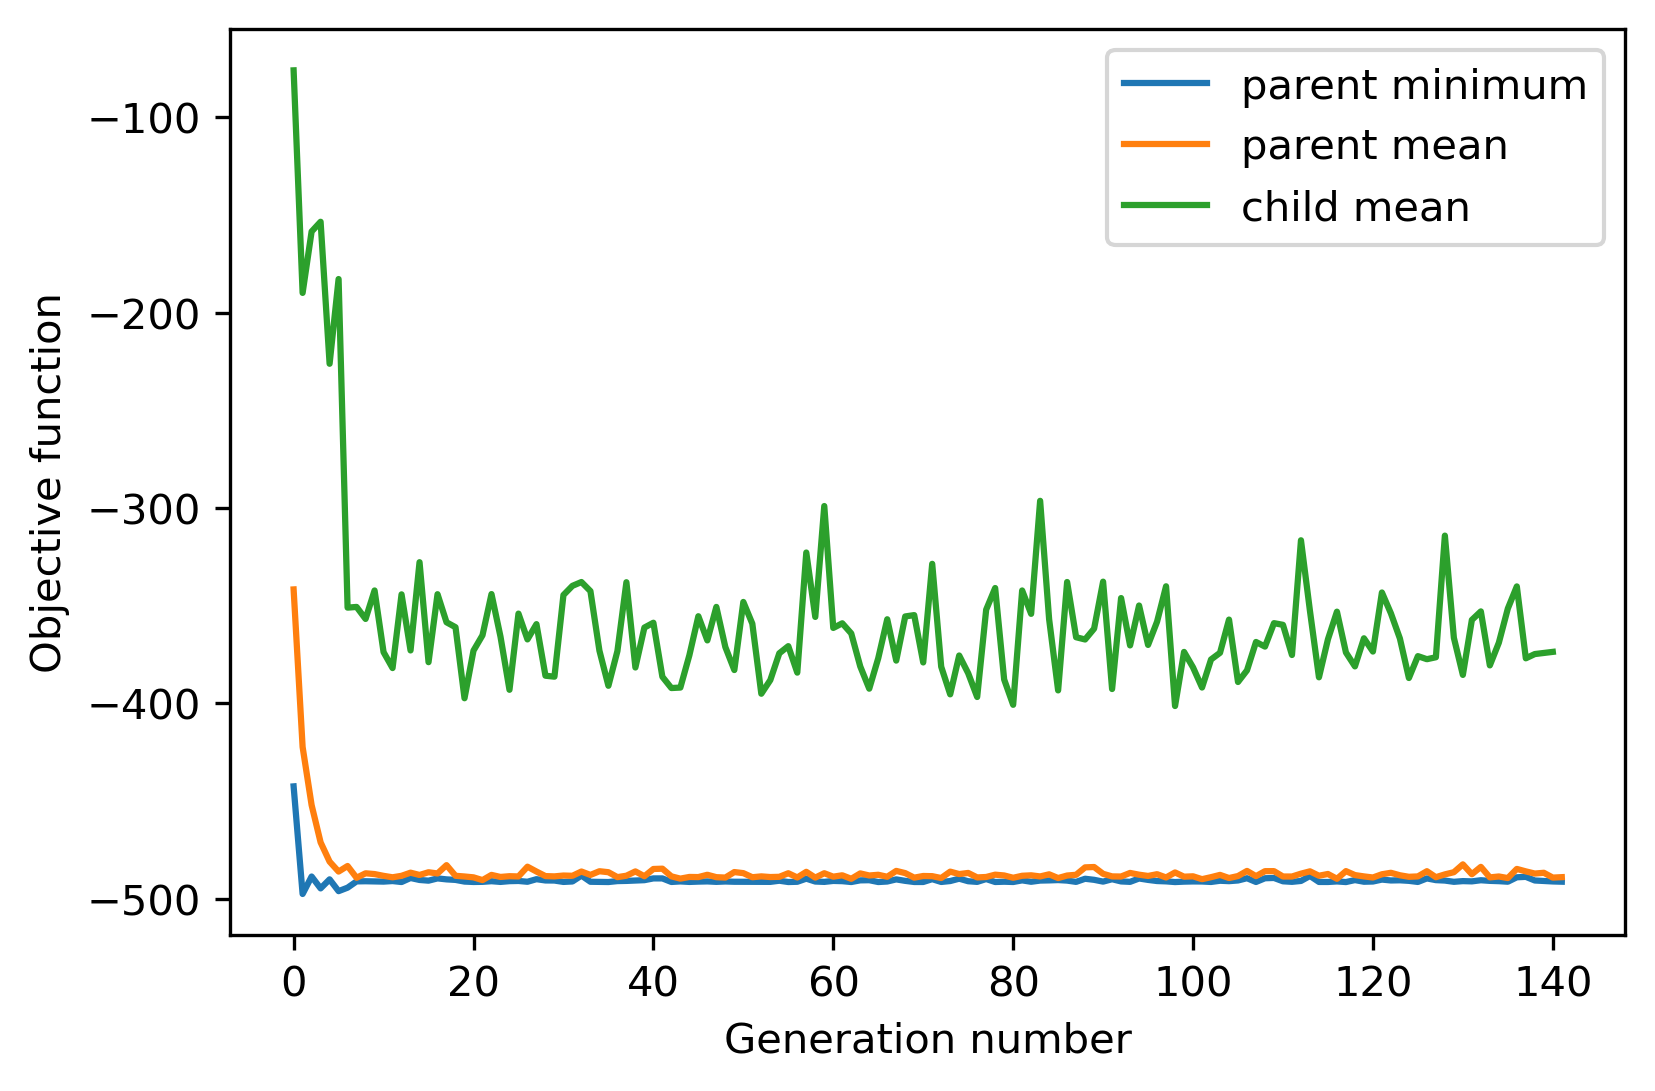

In [82]:
plt.plot(np.min(evo_comp.parent_objective_history_array, axis=1), label="parent minimum")
plt.plot(np.mean(evo_comp.parent_objective_history_array, axis=1), label="parent mean")
plt.plot(np.mean(evo_comp.offspring_objective_history_array, axis=1), label="child mean")
plt.legend()
plt.xlabel("Generation number")
plt.ylabel("Objective function")
plt.savefig("./Figures/ES2D_performance.png")

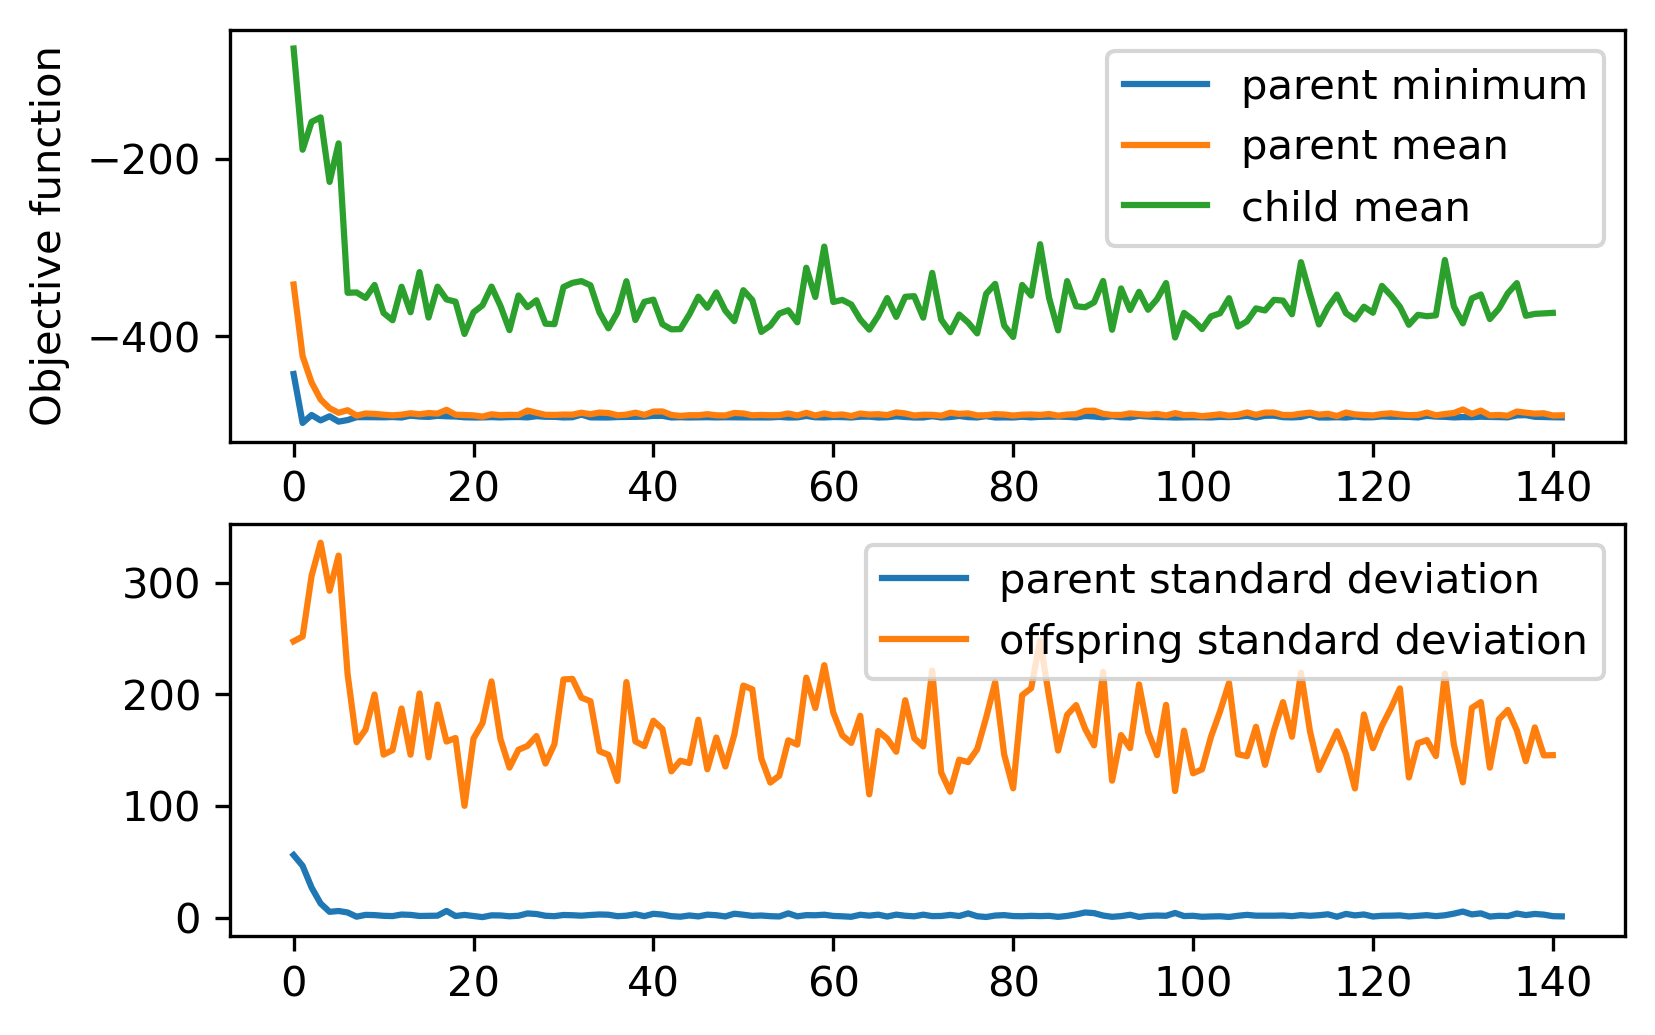

In [81]:
"""
fig, axs = plt.subplots(2,1)
axs[0].plot(np.min(evo_comp.parent_objective_history_array, axis=1), label="parent minimum")
axs[0].plot(np.mean(evo_comp.parent_objective_history_array, axis=1), label="parent mean")
axs[0].plot(np.mean(evo_comp.offspring_objective_history_array, axis=1), label="child mean")
axs[1].plot(np.std(evo_comp.parent_objective_history_array, axis=1), label="parent standard deviation")
axs[1].plot(np.std(evo_comp.offspring_objective_history_array, axis=1), label="offspring standard deviation")

axs[0].legend()
axs[1].legend()
axs[0].set_xlabel("Generation number")
axs[0].set_ylabel("Objective function")
fig.savefig("./Figures/ES2D_performance.png")
"""

# Archive plot

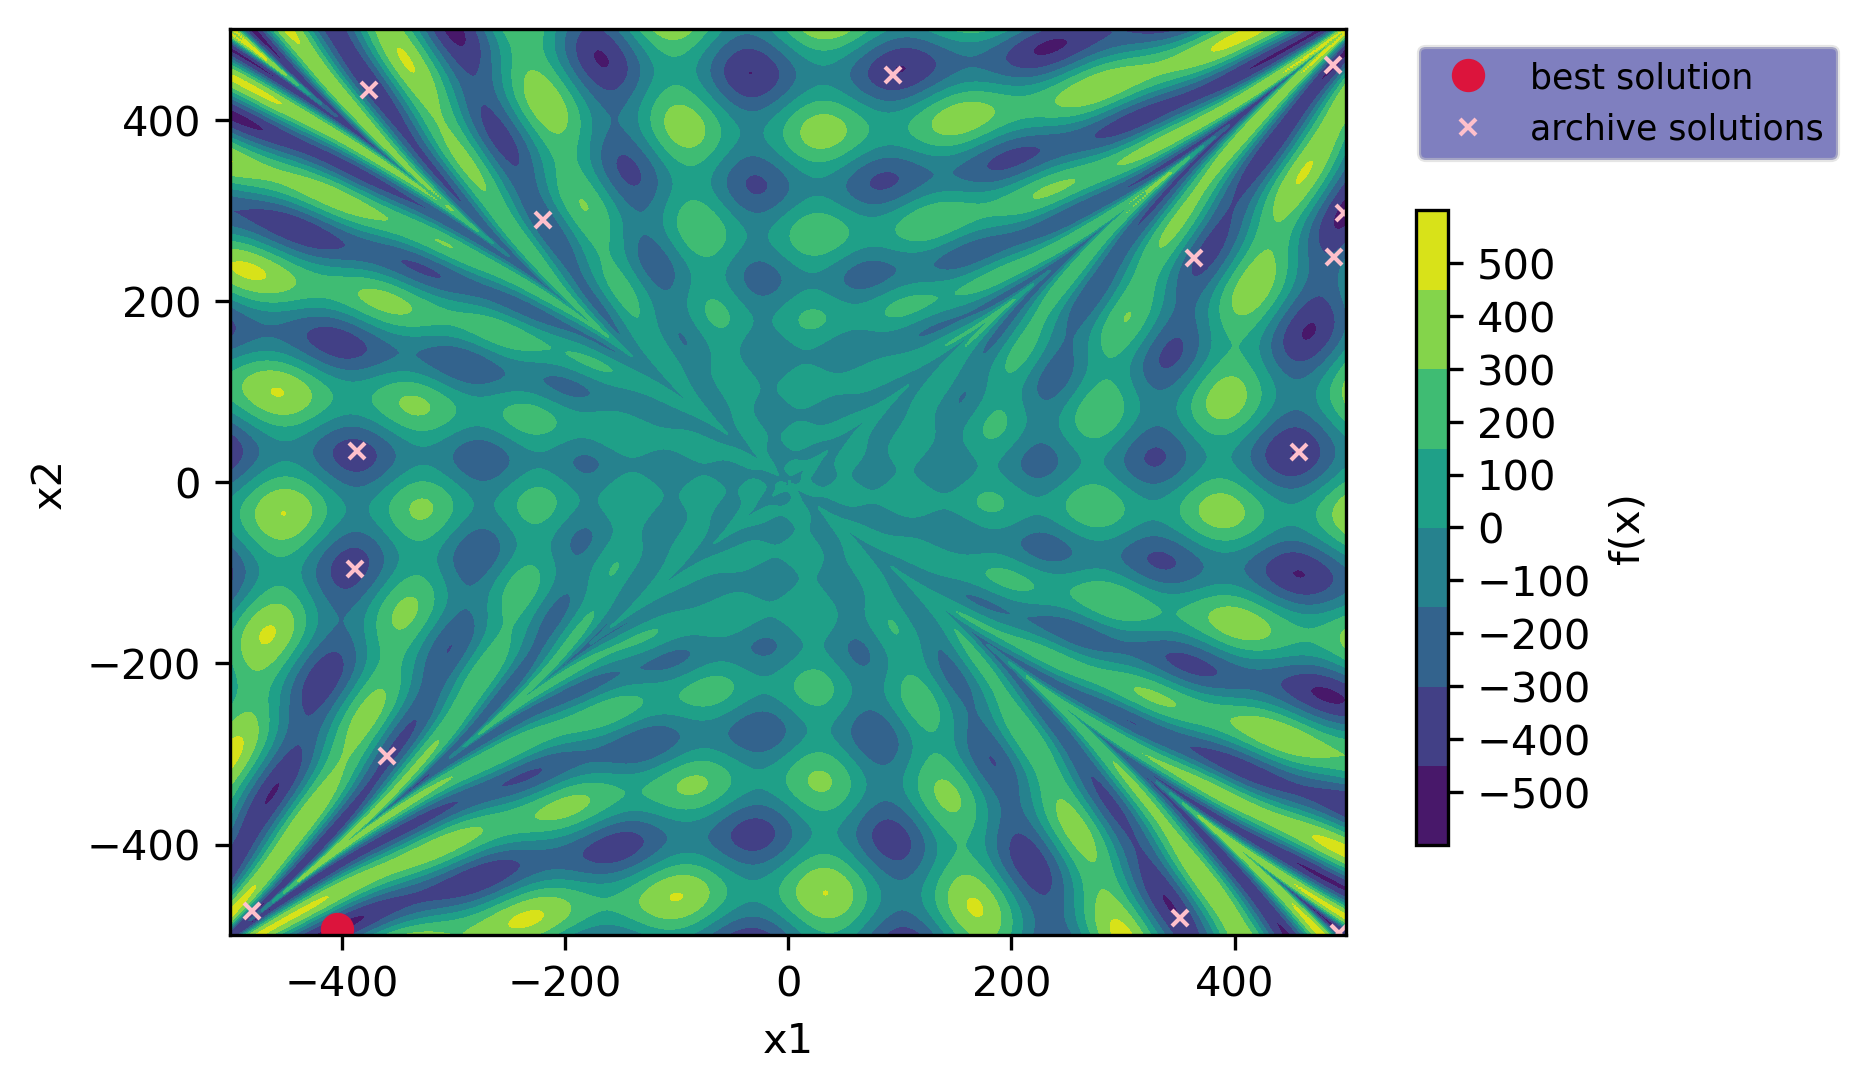

In [72]:
evo_comp.clean_archive()
fig, ax = plt.subplots()
plot_list = []
cs = ax.contourf(x1,x2,z)
CB = fig.colorbar(cs, label="f(x)")
CB.set_ticks(np.linspace(-500, 500, 11))
#evo_comp..clean_archive()
p1, = ax.plot(evo_comp.archive_x[:, 0], evo_comp.archive_x[:, 1], "xr", 
             markersize=4, label="archive solutions", color="pink")
p2, = ax.plot(x_result[0], x_result[1], 
             'o', ms=7, color="crimson",
             label="best solution")
plot_list.append(p2); plot_list.append(p1)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(handles=plot_list, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', facecolor='navy', framealpha=0.5)
l, b, w, h = ax.get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.7])

fig.savefig("./Figures/ES2D_archive.png")

# Search Pattern

<ipython-input-73-ac90f227d555>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


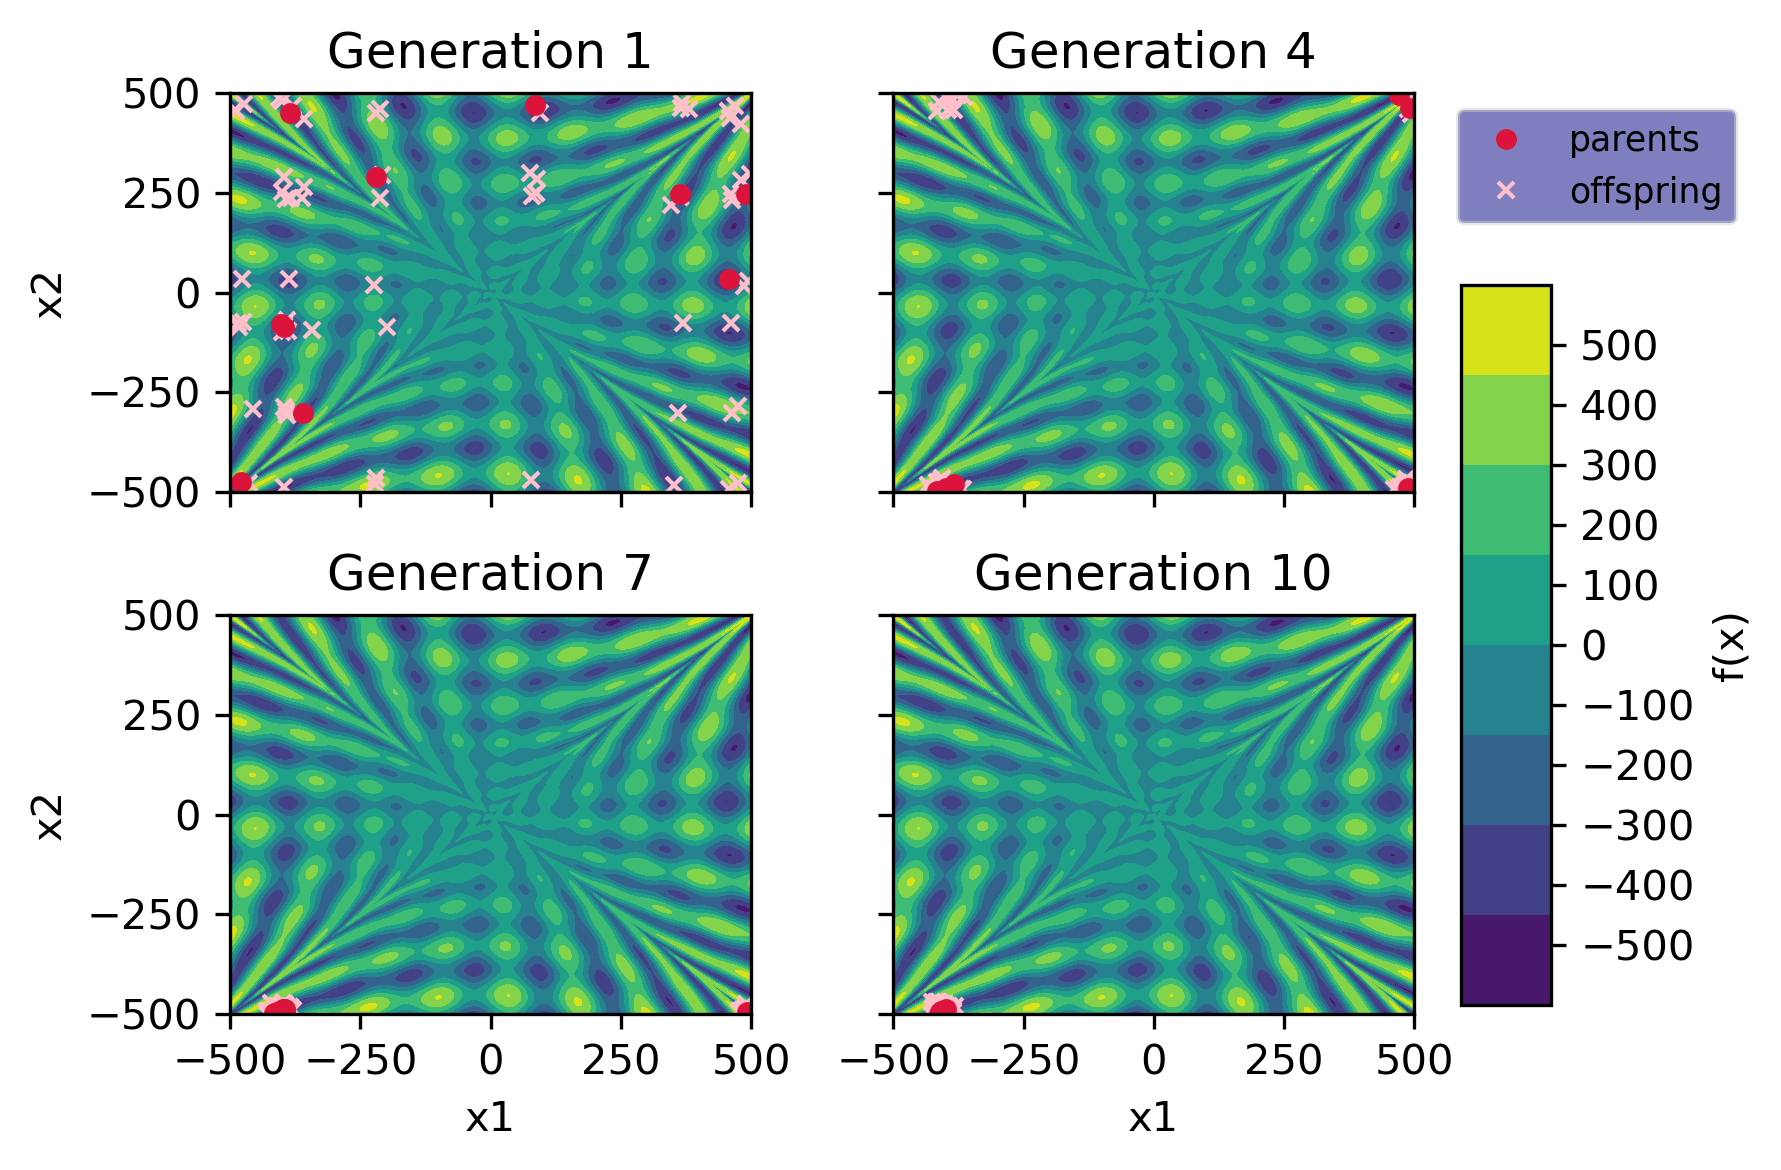

In [73]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
plot_list = []
for i, generation in enumerate([0, 3, 6, 9]):
    offspring = evo_comp.offspring_x_history_array[generation, :, :]
    parents =  evo_comp.parent_x_history_array[generation, :, :]
    row = int(i/2)
    col = i % 2 
    cs = ax[row, col].contourf(x1,x2,z)
    p1, = ax[row, col].plot(offspring[:, 0], offspring[:, 1], "xr", 
                 markersize=4, label="offspring", color="pink")
    p2, = ax[row, col].plot(parents[:, 0], parents[:, 1], 
                 'o', ms=4, color="crimson",
                 label="parents")
    ax[row, col].set_title(f"Generation {generation+1}")

    
plot_list.append(p2); plot_list.append(p1)

ax[0, 1].legend(handles=plot_list, bbox_to_anchor=(1.05, 1), loc='upper left', 
                fontsize='small', facecolor='navy', framealpha=0.5)    

fig.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.05, 0.6])
CB = fig.colorbar(cs, label="f(x)", cax=cbar_ax)
CB.set_ticks(np.linspace(-500, 500, 11))

ax[1, 1].set_xlabel("x1")
ax[1, 0].set_xlabel("x1")
ax[0, 0].set_ylabel("x2")
ax[1, 0].set_ylabel("x2")
fig.tight_layout()
fig.savefig("./Figures/ES2D_progress_contour_SIMPLE.png")

# Cholesky

In [ ]:
Comp_config = {"objective_function": rana_func,
               "x_bounds" : (-500, 500),
                "x_length" : 2,
                "parent_number" : 10, 
                "child_to_parent_ratio" : 7,
                "bound_enforcing_method" : "not_clipping" ,
                "selection_method" :  "standard_mew_comma_lambda" ,
                "standard_deviation_clipping_fraction_of_range" : 0.01,
                "mutation_covariance_initialisation_fraction_of_range" : 0.01 , 
                "mutation_method" : "complex",
               "termination_min_abs_difference": 1e-6, 
              "maximum_archive_length": 100, "archive_minimum_acceptable_dissimilarity":0.1}
random_seed = 1

In [ ]:
evo_comp.parent_covariance_determinant_history_array.shape

In [ ]:
plt.plot(np.mean(evo_comp.parent_covariance_determinant_history_array, axis=1))
plt.plot(np.mean(evo_comp.offspring_covariance_determinant_history_array, axis=1))
plt.yscale("log")